<div class="alert alert-block alert-info">

<b>Note:</b> this template was adpated from TeachOpenCADD's [GitHub repository](https://github.com/volkamerlab/teachopencadd).

</div>

# Understanding the Expressive Power of GNNs

**Note:** This talktorial was created as a part of the 2024 [Hands-on Graph Neural Networks seminar](https://cms.sic.saarland/hognn2024/) at Saarland University.

Author:
- Cameron Braunstein, 2024-5, Saarland University, https://cameronbraunstein.github.io/

## Aim of this talktorial

<div class="alert alert-block alert-info">
<b>Aim:</b>
Add a short summary of this talktorial's content.

</div>

This tutorial is an investigation into the expressive power of graph neural networks.
Its aim is to examine how well graph neural networks can distinguish between non-isomorphic graphs. 
We will first explain the Weisfeiler-Lehman (WL) graph isomorphism test, and then construct a Graph Isomorphism Network (GIN), a graph neural network which can be formally proven to be as powerful in distinguishing graphs as the WL test.
Finally, we will provide corner-case pairs of graphs which both these methods are unable to determine whether the pair is non-isomorphic, giving participants a better sense of the limitations of these methods.

<div class="alert alert-block alert-info">

<b>Option 1 (pick one):</b> separate theory and practical parts.

</div>

## Contents in *theory*

_Add Table of Contents (TOC) for Theory section._

* ...
* ...

## Contents in *practice*

_Add Table of Contents (TOC) for Practical section._

* ...
* ...

<div class="alert alert-block alert-info">

<b>Option 2, used in this template</b>: interleaving theoretical and practical parts.

</div>

## Contents
- Why do we want to distinguish between graphs?
- Weisfeiler-Lehman (WL) graph isomorphism test
- Constructing the Graph Isomorphism Network (GIN)
- Corner cases

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: The bullet points in your TOC should refer to the headlines of your other sections at level 3 (``### {{Section headline}}``).

</div>

## References

<div class="alert alert-block alert-info">

If you refer to publications in your talktorial, please gather them here.
If there are any other important reference you used, e.g. further reading material, external code repositories, ..., please also list them here.

</div>

*For paper resources we suggest the following citation style:*
- Keyword describing resource: ([1st auhtor last name ((et al.)) <i>Journal</i> (year), <b>volume</b>](link to resource))

*Example:*
- Neural message passing for quantum chemistry: [Gilmer et al., *ICML, PMLR* (2017), **70**](http://proceedings.mlr.press/v70/gilmer17a/gilmer17a.pdf)
- ZINC15 dataset: [Irwin et al., *J. Chem. Inf. Model.* (2012), **55**](https://pubs.acs.org/doi/10.1021/ci3001277)
- [PyTorch Geometric package](https://pytorch-geometric.readthedocs.io/en/latest/)

If an in-text citation seems appropriate, use the APA format with a link, i.e. ([1st author last name et al., year](link to resource))

*Example:*
> We implement a basic GNN based on the message-passing framework introduced by ([Gilmer et al., 2017)](http://proceedings.mlr.press/v70/gilmer17a/gilmer17a.pdf).



---------------
- How Powerful are Graph Neural Networks?: [Xu et al., <i>ICLR</i> (2019)](https://arxiv.org/abs/1810.00826)

- A Short Tutorial on The Weisfeiler-Lehman Test And Its Variants: ([Huang et al. <i>ICASSP</i> (2021)](https://arxiv.org/abs/2201.07083))


## Python Dependencies

*If setting up a Python environment that runs your code requires some nasty extra steps, **HERE** is the place to mention them.*

<div class="alert alert-block alert-info">

<b>Dependency management</b>:
Please state your dependencies in a [pip-compatible](https://pip.pypa.io/en/stable/reference/requirements-file-format/) `requirements.txt` file format.
Try to pin at least the major versions of your dependencies, e.g. PyTorch, PyTorch Geometric, pandas, etc.
This will help to create a reproducible environment and self-contained notebook.

We recommend that you work with a [virtual environment](https://docs.python.org/3/library/venv.html) locally.
Use the conda package manager only if you think it is absolutely necessary.

</div>

In [ ]:
#How to set up the talktorial venv in local directory
python -m venv talktorial
source talktorial/bin/activate
pip install jupyter ipykernel
python -m ipykernel install --user --name=talktorial --display-name "Python (talktorial)"


In [ ]:
requirements = """
networkx
matplotlib
"""

In [17]:
!pip install -r <(echo "$requirements")

  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/99/ff/c87e0622b1dadea79d2fb0b25ade9ed98954c9033722eb707053d310d4f3/sympy-1.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


<div class="alert alert-block alert-info">

<b>Imports</b>: Please add all your imports in a code cell within this section, ordered by standard library / 3rd party packages.
Read more on imports and import order in the <a href="https://www.python.org/dev/peps/pep-0008/#imports">"PEP 8 -- Style Guide for Python Code"</a>.
    
</div>

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from enum import Enum
import math

<div class="alert alert-block alert-info">
    
<b>Seeding</b>: try to make your code reproducible by setting seeds for random number generators.

</div>

In [ ]:
#pl.seed_everything(42)

Seed set to 42


42

<div class="alert alert-block alert-info">
    
<b>Links</b>: If you place links, please link descriptive words.

</div>

For example

> __No__: PyTorch Geometric ([here](https://pytorch-geometric.readthedocs.io/en/latest/)) is a python package for graph neural networks.

> __No__: PyTorch Geometric (https://pytorch-geometric.readthedocs.io/en/latest/) is a python package for graph neural networks.

> __Yes__: [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) is a python package for graph neural networks.

## Contents
### Motivation: Why Do We Want to Distinguish Graphs?

<div class="alert alert-block alert-info">
    
<b>Story/Motivation</b>: the way you explain your topic should also convey some motivation or sense for why it is important.

</div>

Graphs are discrete data structures used to model objects (_nodes_) and their relations (_edges_ that connect nodes). Graph neural networks (_GNNs_) process graphs and produce a feature representation that can be used in downstream tasks. 

In many real world scenarios, we want GNNs to distinguish between graphs that are  _non-isomorphic_, _ie._, that have a structure.

For example, we want to check whether a given molecule is non-toxic. Assume we have a bank of known toxic molecules. The molecules are represented by graphs, where nodes are atoms, and edges are chemical bonds. If we can certify that our given molecule's structure is non-isomorphic any of the toxic molecules' structure, then we can know that the molecule is non-toxic (at least, we know it is not equivalent to any known toxic chemical).






![chemical_comparison.png](graphics/chemical_comparison.png)


Non-toxic Glucose (left) and toxic Furfural (right) (Visualizations courtesy of https://pubchem.ncbi.nlm.nih.gov). We want a method for distinguishing between these molecular structures. TODO: make a URL

Determining whether two graphs are isomorphic or not is not known to be solvable in polynomial time. 

However, the _Weisfeiler-Lehman_ (WL) test is a useful polynomial time test used to determine whether two graphs are non-isomorphic, or undecided as isomorphic or non-isomorphic. 

In the following section, we will show how the WL test works. Later, we will construct a GNN which effectively performs the WL test.

### The Weisfeiler-Lehman Test

The WL test processes graphs into directly comparable output representations. If two outputs are different, then the input graphs are formally gaurenteed to be non-isomorphic. If the outputs are the same, then the test is inconclusive: the graphs might be isomorphic, or they might be non-isomorphic.

![WL_overview.png](graphics/WL_overview.png)

An overview of the WL test. Two graphs are processed by the WL algorithm (to be explained below). The resulting output representations can be directly compared.

<div class="alert alert-block alert-info">
    
<b>Figures</b>: to ensure that the notebook is self-contained, please include figures directly in the notebook, e.g. using URLs and HTML as in the example below.

</div>

<div class="alert alert-block alert-info">
    
<b>Formulas</b>: Please use LaTeX to typeset formulas.
</div>

We will establish notation, present the WL algorithm, and then give an example in python code. For the remainder of this tutorial, we consider undirected graphs $G = (V,E)$, where each vertex $v \in V$ has an associated feature $x_v$. Let $N(v)$ be the set of neighboring vertices to $v$.

Let $K$ denote the number of iterations of the WL algorithm. We functions $\text{aggregate}^k$, $\text{combine}^k$ and $readout$ are injective functions which we will implement in later sections. The WL algorithm runs as follows:

$WL(G=(V,E),K)$:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_v^0 \leftarrow x_v$ for $v \in V$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k \leftarrow 0$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; while $k <= K$:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for $v$ in $V$:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_v^{k+1} \leftarrow \text{combine}^k(x_v^k,\text{aggregate}^k({ x_w^k | w \in N(v)}))$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k \leftarrow k+1$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; return $\text{readout}({x_v^K | v \in V})$


Given two graphs $G,H$, we compare $WL(G,K)$ to $WL(H,K)$. If these are different, then $G$ and $H$ are non-isomorphic. If these are the same, then the test is inconclusive. Increasing the value of $K$ will increase the discriminative power of the test, at the cost of higher computation time.

<div class="alert alert-block alert-info">

<b>Functions and class methods</b>:

<ul>
<li>Please add docstrings to your functions using a consistent format / level of detail.</li>
<li>Please expose all variables used within a function in the function's signature (i.e. they must be function parameters), unless they are created within the scope of the function.</li>
<li>Please add comments outside of docstrings purposefuly and in a measured way. Think of comments as justifications for lines of code whose purpose may not be apparent given the context.</li>
<li>Please use meaningful class, function and parameter names. This applies also to variable names.</li>
</ul>
    
</div>

<div class="alert alert-block alert-info">

<b>Formatting</b>: Use the black code formatter to ensure consistent code formatting!
    
</div>

### WL Test in Code

To work through the WL algorithm, we first create and visualize two graphs $G$ and $H$. In these examples, each feature $x_v$ is one of three colors: red ('r'), blue ('b'), and green ('g').

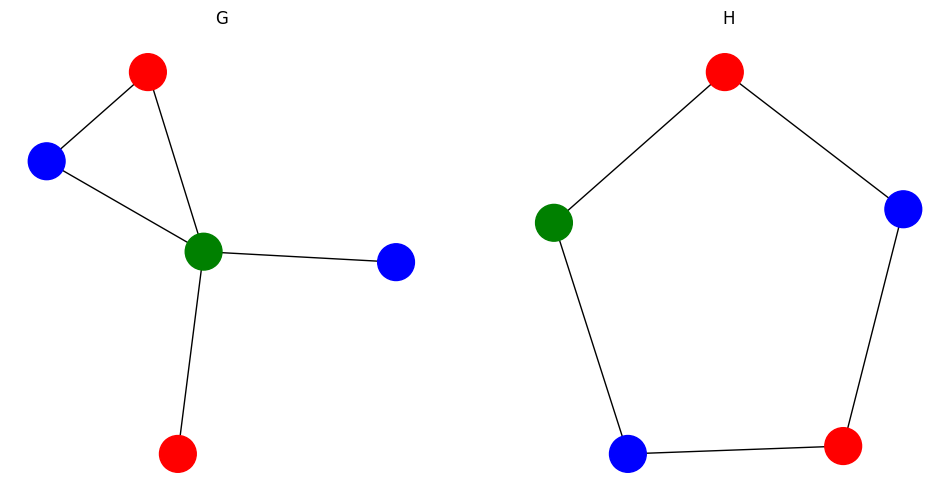

In [89]:
#Return graphs G and H that have the same number of nodes and edges, but different structure
def get_non_isomorphic_graphs():
    G = nx.Graph()
    G.add_node(0, color='r')
    G.add_node(1, color='b')
    G.add_node(2, color='g')
    G.add_node(3, color='r')
    G.add_node(4, color='b')
    G.add_edge(0, 1)
    G.add_edge(1, 2)
    G.add_edge(2, 0)
    G.add_edge(2, 3)
    G.add_edge(2, 4)

    H = nx.Graph()
    H.add_node(0, color='r')
    H.add_node(1, color='b')
    H.add_node(2, color='g')
    H.add_node(3, color='r')
    H.add_node(4, color='b')
    H.add_edge(0, 1)
    H.add_edge(1, 2)
    H.add_edge(2, 3)
    H.add_edge(3, 4)
    H.add_edge(4, 0)
    return G,H


#Enum for accessing the display arguments
class DisplayArgs(Enum):
    GRAPHS = 'graphs'
    TITLES = 'titles'
    SEEDS = 'seeds'

#Display multiple graphs in a row with supplied titles
def display_graphs(display_args):
    """
    Display multiple graphs in a row with supplied titles.

    Parameters:
    graphs (list): List of networkx graphs.
    titles (list): List of titles for the graphs.
    """
    graphs = display_args[DisplayArgs.GRAPHS]
    titles = display_args[DisplayArgs.TITLES]
    seeds = display_args[DisplayArgs.SEEDS]

    n = len(graphs)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))

    if n == 1:
        axes = [axes]

    color_dict = {
        'r': 'red',
        'g':'green',
        'b':'blue'
    }

    for i, (G, title,seed) in enumerate(zip(graphs, titles,seeds)):
        pos = nx.spring_layout(G, seed=seed)
        node_colors = [color_dict[G.nodes[node].get('color')] for node in G.nodes]
        nx.draw(G, pos, node_color=node_colors, edge_color='black', node_size=700, ax=axes[i])
        #nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, ax=axes[i])
        axes[i].set_title(title)

    plt.show()

G,H = get_non_isomorphic_graphs()

display_args = {
    DisplayArgs.GRAPHS: [G, H],
    DisplayArgs.TITLES: ['G', 'H'],
    DisplayArgs.SEEDS: [1, 0]
}

display_graphs(display_args)

### Classical Weisfeiler Lehman Algorithm 

To implement the WL test in code, we define the $\text{aggregate}^k$ and $\text{combine}^k$ functions we used in our pseudocode. The goal of these functions is to capture information about the local area around the vertex. The most direct way to do this is to make each feature $x_v^k$ a traversal tree of $k$ steps, where the root is vertex $v$.

We define every $\text{aggregate}^k$ with a single function `WL_aggregate`, which collects all feature trees of neighboring nodes into a single list.

We deine every $\text{combine}^k$ with a single function `WL_combine`, which forms a new tree from the aggregated feature trees, with the original vertex $v$ as the node.

We visualize how these feature trees grow for graph $G$ with respect to the max iteration count $K$. The collection of encodings after $K$ iterations is computed by `WL_encodings(G,K)`.

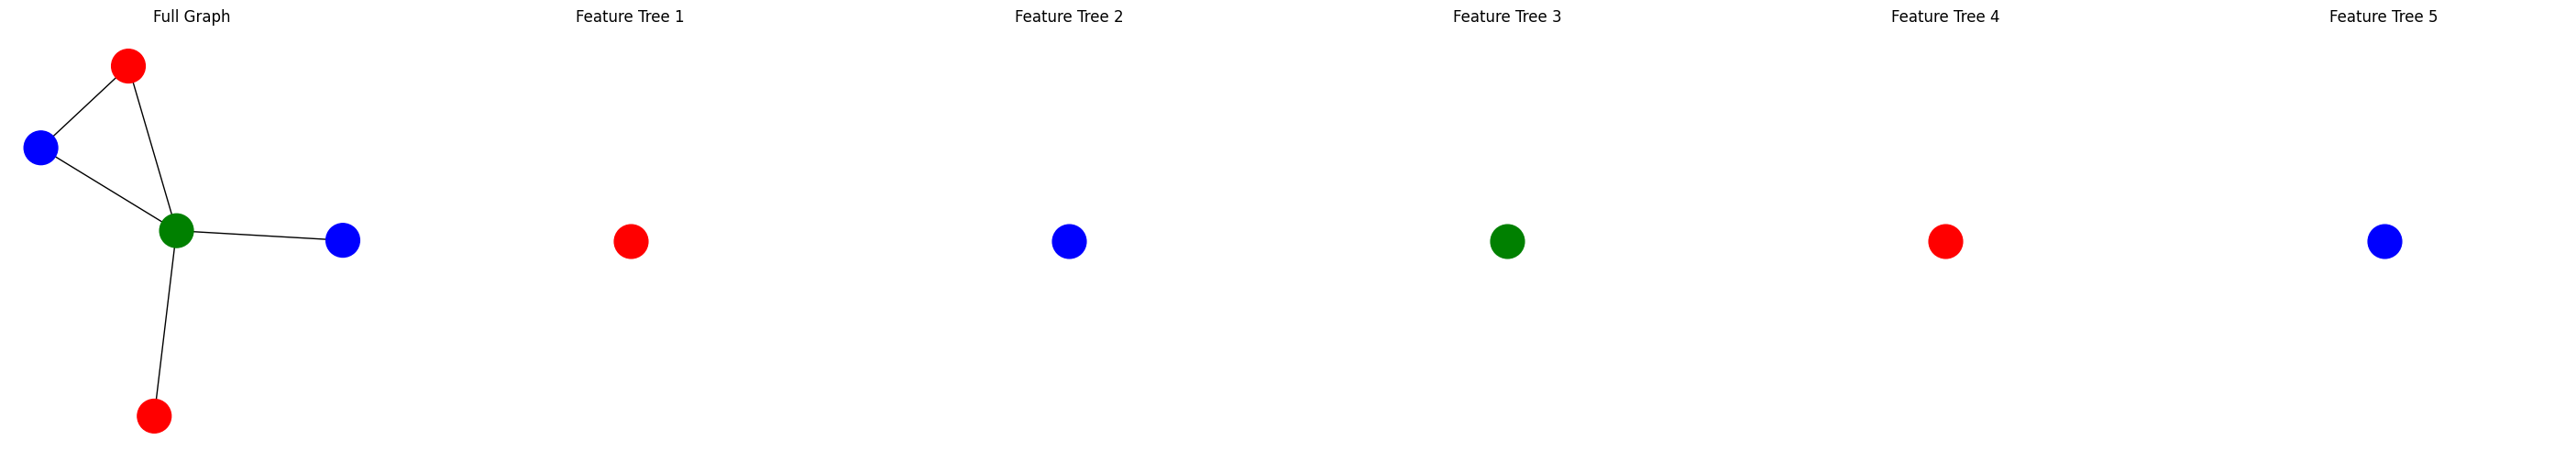

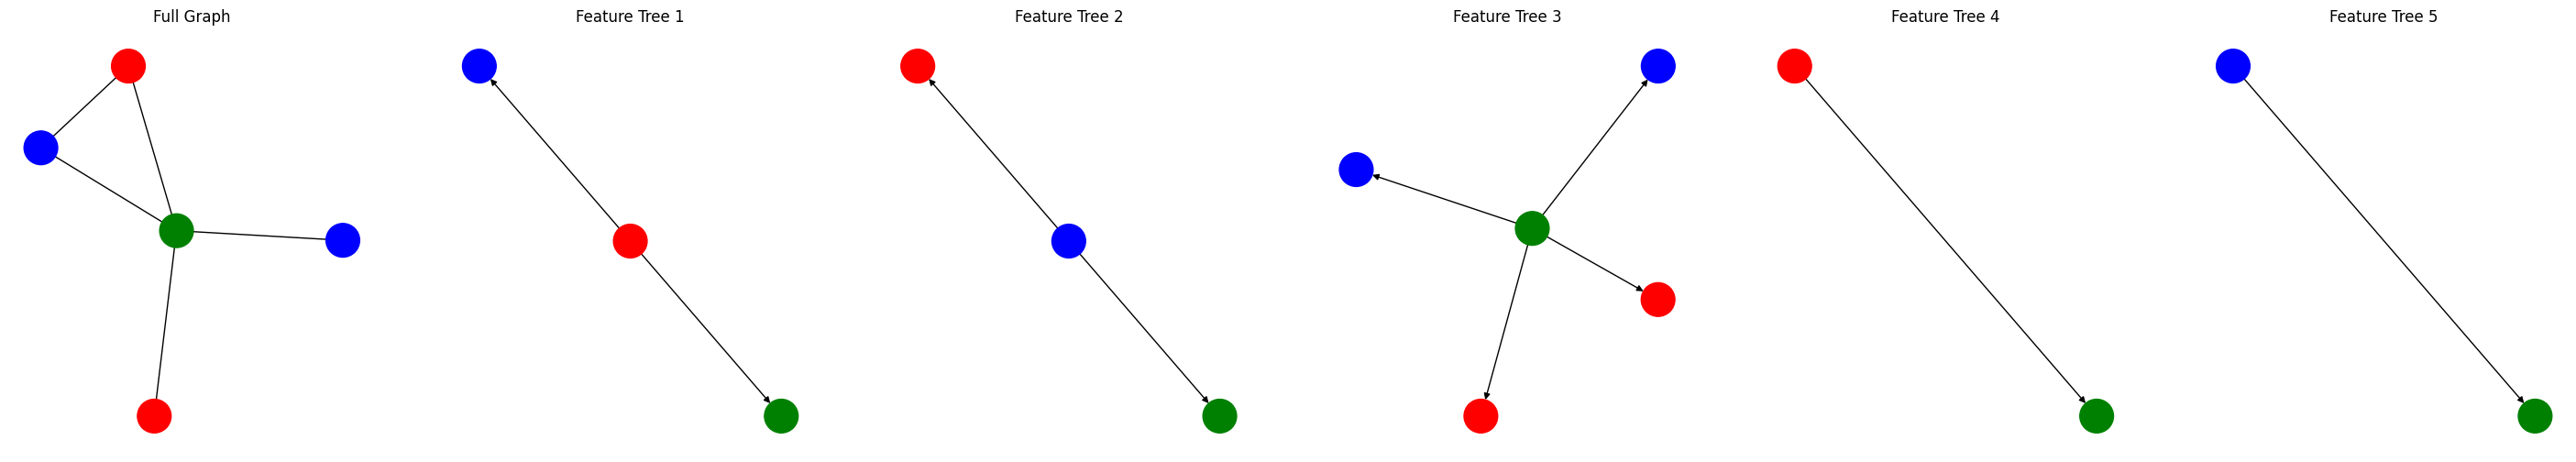

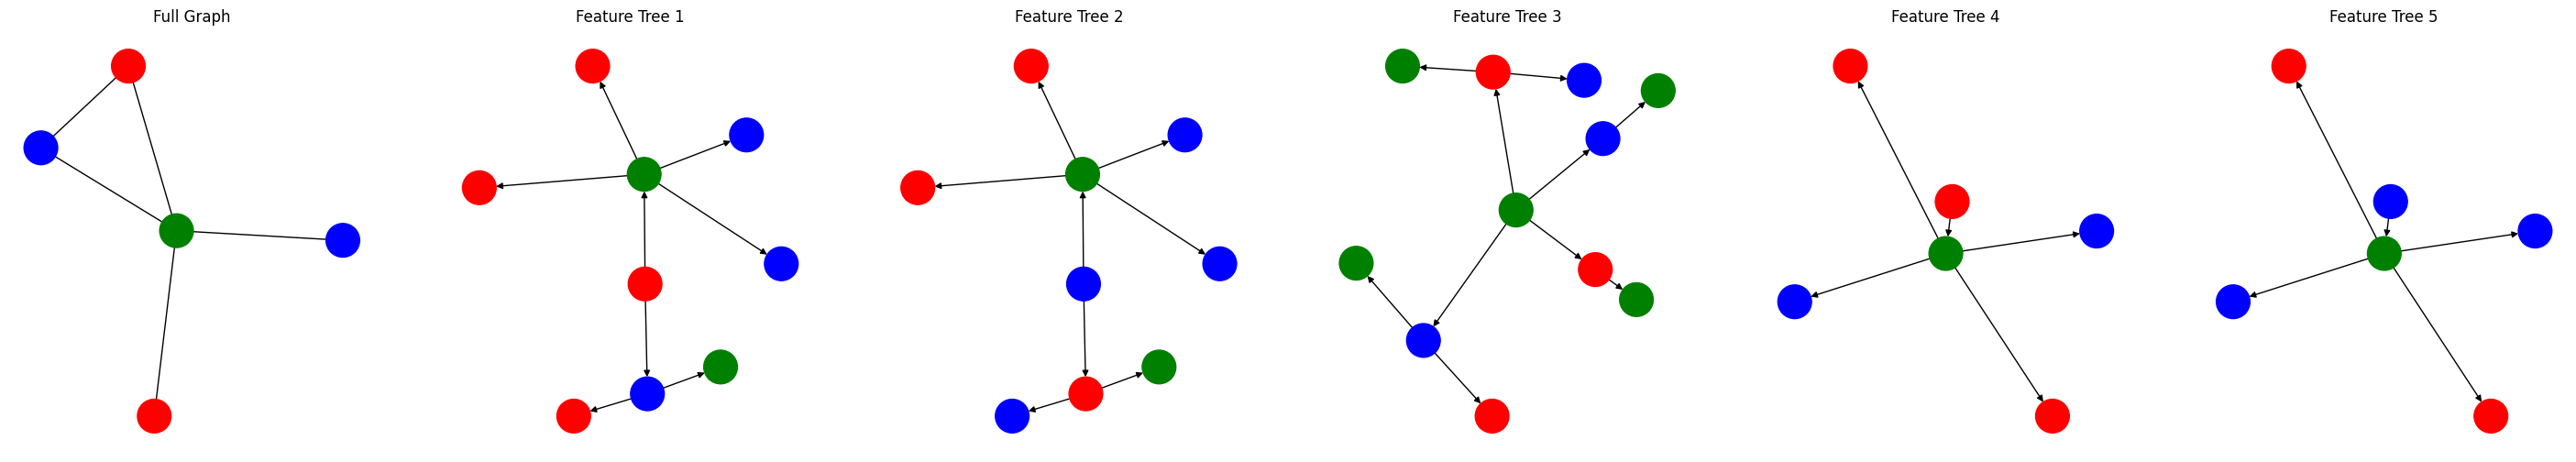

In [ ]:
#Collect all neighboring feature trees
def WL_aggregate(neighbors,G_trees):
    neighbor_trees = []
    for neighbor in neighbors:
        copy_neighbor_tree = G_trees[neighbor].copy()
        neighbor_trees.append(copy_neighbor_tree)
    return neighbor_trees

#Combine the neighboring feature trees into a single tree
def WL_combine(node,aggregate_result,G):
    new_tree = nx.DiGraph()
    new_tree.add_node(node,color=G.nodes[node]['color'])
    for neighbor_tree in aggregate_result:
        mapping = {node: node + max(new_tree.nodes)+1 for node in neighbor_tree.nodes}
        mapped_neighbor_tree = nx.relabel_nodes(neighbor_tree, mapping)
        new_tree = nx.compose(new_tree, mapped_neighbor_tree)
        new_tree.add_edge(node, min(mapped_neighbor_tree.nodes))
    return new_tree

#Perform K rounds of feature tree aggregations and combinations of graph G
def WL_encodings(G,K):
    #Initialize features.
    G_trees = {}
    for node in G.nodes:
        #Node features are initially a single node tree with the original node's color
        tree_root = nx.DiGraph()
        tree_root.add_node(node,color=G.nodes[node]['color'])
        G_trees[node] = tree_root
    
    for k in range(K):
        aggregate_results = {}
        for node in G.nodes:
            #Aggregate features from neighboring nodes
            neighbors = list(G.neighbors(node))
            aggregate_results[node] = WL_aggregate(neighbors,G_trees)
        
        for node in G.nodes:
            #Combine the aggregated features with the node itself
            aggregate_result = aggregate_results[node]
            combine_result = WL_combine(node,aggregate_result,G)
            G_trees[node] = combine_result

    return G_trees


#Build displays for K= 0,1,2
G_encodings = WL_encodings(G,K=0)
display_args = {
    DisplayArgs.GRAPHS: [G,G_encodings[0], G_encodings[1],G_encodings[2],G_encodings[3],G_encodings[4]],
    DisplayArgs.TITLES: ['Full Graph','Feature Tree 1', 'Feature Tree 2','Feature Tree 3','Feature Tree 4','Feature Tree 5'],
    DisplayArgs.SEEDS: [1,1,1,1,0,0]
}
display_graphs(display_args)

G_encodings = WL_encodings(G,K=1)
display_args[DisplayArgs.GRAPHS]= [G,G_encodings[0], G_encodings[1],G_encodings[2],G_encodings[3],G_encodings[4]]
display_graphs(display_args)

G_encodings = WL_encodings(G,K=2)
display_args[DisplayArgs.GRAPHS]= [G,G_encodings[0], G_encodings[1],G_encodings[2],G_encodings[3],G_encodings[4]]

display_graphs(display_args)

We implement the $\text{readout}$ function with `WL_readout`, by converting all feature trees into alphabetically sorted strings, and then concentanting these strings together in an alphabetical order. This ordering ensures that outputs for different graphs can be accurately compared.

Our method `WL_test` runs the entire WL test. We see that the value of $K$ affects the result: higher values give more discriminative power.

In [ ]:
#Combine all node feature trees into a single readout string
def WL_readout(G_encodings):

    #Helper function to represent a tree as a string
    def tree_to_string(root_node,tree):
        color = tree.nodes[root_node]['color']
        result = f'{color}'
        successor_strings = []
        for succesor in tree.successors(root_node):
            successor_strings.append(f'({tree_to_string(succesor,tree)})')
        result += ''.join(sorted(successor_strings))
        return result
    
    tree_strings = []
    for root_node, feature_tree in G_encodings.items():
        tree_strings.append(tree_to_string(root_node,feature_tree))
    return '_'.join(sorted(tree_strings))


def WL_test(G,H,K):
    #Perform K rounds of feature encodings
    G_encodings = WL_encodings(G,K)
    H_encodings = WL_encodings(H,K)

    #Combine the features together
    G_readout = WL_readout(G_encodings)
    H_readout = WL_readout(H_encodings)

    print('readout of G: ', G_readout)
    print('readout of H: ', H_readout)
    
    #Compare readouts
    if G_readout != H_readout:
        print("The graphs are not isomorphic.")
    else:
        print("WL test is inconclusive. The graphs might be isomorphic, or they might not be.")

print('After K=0 rounds of encodings, the WL-test is inconclusive:')
print()
WL_test(G,H,K=0)
print()

print('After K=1 rounds of encodings, the WL-test detects that the graphs are nonisomorphic: ')
print()
WL_test(G,H,K=1)
print()

After K=0 rounds of encodings, the WL-test is inconclusive:

readout of G:  b_b_g_r_r
readout of H:  b_b_g_r_r
WL test is inconclusive. The graphs might be isomorphic, or they might not be.

After K=1 rounds of encodings, the WL-test detects that the graphs are nonisomorphic: 

readout of G:  b(g)_b(g)(r)_g(b)(b)(r)(r)_r(b)(g)_r(g)
readout of H:  b(g)(r)_b(r)(r)_g(b)(r)_r(b)(b)_r(b)(g)
The graphs are not isomorphic.



### Graph Isomorphism Network

The GIN is a constructed network which mimics the WL-algorithm, and can be formally proven to have the same discriminative power.

The key idea is that each $\text{aggregate}^k$ and $\text{combine}^k$ cycle can be implemented with layer $k$ of a GNN. 

Xu _et al._ show that the vertex features $x_v^k$ can encode local area information about the vertex $v$, and can even encode the full $K$ traversal tree without any collisions. In code, each $x_v^k$ as an instance of the class `UniqueFloatingPointValue`

In [ ]:
#Our 1 dimenional feature vector class. It represents a real number which represents a string encoding of a feature tree.
class UniqueFloatingPointValue:
    EXP_VALUE = 1.01 #If sufficiently large integer, then the GIN is guaranteed to be injective (see Proof of Lemma 5 in appendix)
    STABILITY_MODULUS = 5000 #Added for numerical stability. Set to infinity to guarantee injectivity of the GIN
    STABILITY_DIVISION = 100 #Added for numerical stability. Set to 1 to guarantee injectivity of the GIN

    def __init__(self,feature_string):
        # Encode the string to bytes
        string_bytes = feature_string.encode('utf-8')
        # Convert the byte array to an integer
        self.int_feature_value = int.from_bytes(string_bytes, 'big')

    def get_as_converted_int(self):
        return self.int_feature_value

    def get_as_floating_point(self):
        return 1/math.pow(UniqueFloatingPointValue.EXP_VALUE,
            (self.int_feature_value/UniqueFloatingPointValue.STABILITY_DIVISION)%UniqueFloatingPointValue.STABILITY_MODULUS)

    def get_as_string(self):
        # Convert the integer to a byte array
        int_bytes = self.int_feature_value.to_bytes((self.int_feature_value.bit_length() + 7) // 8, 'big')
        # Decode the byte array to a string
        feature_string = int_bytes.decode('utf-8')
        return feature_string

We now adapt the WL test functions to a GIN. Each method with the name `WL_<action>` is renamed to `GIN_<action>`, and the code is tweaked to handle the new feature format. 

Each each $\text{aggregate}^k$ and $\text{combine}^k$ cycle is implementented through `GIN_aggregate` and `GIN_combine`, which could the vertice's local area information in a collision-free manner.

Just as in `WL_test`, `GIN_test` is inconclusive when $K=0$, but conclusive when $K>=1$

In [109]:
#Collect the set of all neighboring features
def GIN_aggregate(neighbors,G_features):
    neighbor_trees = []
    for neighbor in neighbors:
        neighbor_trees.append(G_features[neighbor])
    return neighbor_trees

# Combine all features. In a true GIN, this is implemented by summing the local features 
# together, and then passing this feature through an MLP.
#
# For clarity, we perform these steps together through alphabetized string concatenation, 
# similar to the WL-test code.
#
# Xu et al. show that a sufficiently large MLP will be able to perform a computation that is 
# practically equivalent to this alphabetized string concatenation, losslessly encoding all
# local area information.
def GIN_combine(node,aggregate_result,G_features):
    root_feature = G_features[node]
    combination_string = root_feature.get_as_string()
    results_strings = []
    for result in aggregate_result:
        results_strings.append(result.get_as_string())
    
    for result_string in sorted(results_strings):
        combination_string+=f'({result_string})'

    combination_floating_point_value = UniqueFloatingPointValue(combination_string)
    return combination_floating_point_value

def GIN_encodings(G,K):
    #Initialize features.
    G_features = {}
    for node in G.nodes:
        #Node features are initially the node's color
        G_features[node] = UniqueFloatingPointValue(G.nodes[node]['color'])
    
    for k in range(K):
        aggregate_results = {}
        for node in G.nodes:
            #Aggregate features from neighboring nodes
            neighbors = list(G.neighbors(node))
            aggregate_results[node] = GIN_aggregate(neighbors,G_features)
        
        for node in G.nodes:
            #Combine the aggregated features with the node itself
            aggregate_result = aggregate_results[node]
            combine_result = GIN_combine(node,aggregate_result,G_features)
            G_features[node] = combine_result

    return G_features

#Combine all node feature trees into a single readout string
def GIN_readout(G_encodings):
    feature_strings = []
    for encoding in G_encodings.values():
        feature_strings.append(encoding.get_as_string())

    combined_feature =  UniqueFloatingPointValue('_'.join(sorted(feature_strings)))
    return combined_feature


def GIN_test(G,H,K):
    #Perform K rounds of feature encodings
    G_encodings = GIN_encodings(G,K)
    H_encodings = GIN_encodings(H,K)

    #Combine the features together
    G_readout = GIN_readout(G_encodings)
    H_readout = GIN_readout(H_encodings)

    print('readout of G (string): ', G_readout.get_as_string())
    print('readout of H (string): ', H_readout.get_as_string())

    int_G_readout = G_readout.get_as_floating_point()
    int_H_readout = H_readout.get_as_floating_point()
    

    print('readout of G (floating point): ', int_G_readout)
    print('readout of H (floating point): ', int_H_readout)
    #Compare readouts
    if int_G_readout != int_H_readout:
        print("The graphs are not isomorphic.")
    else:
        print("WL test is inconclusive. The graphs might be isomorphic, or they might not be.")

print('After K=0 rounds of encodings, the WL-test is inconclusive:')
print()
GIN_test(G,H,K=0)
print()

print('After K=1 rounds of encodings, the WL-test detects that the graphs are nonisomorphic: ')
print()
GIN_test(G,H,K=1)
print()


After K=0 rounds of encodings, the WL-test is inconclusive:

readout of G (string):  b_b_g_r_r
readout of H (string):  b_b_g_r_r
readout of G (floating point):  8.256830624701672e-20
readout of H (floating point):  8.256830624701672e-20
WL test is inconclusive. The graphs might be isomorphic, or they might not be.

After K=1 rounds of encodings, the WL-test detects that the graphs are nonisomorphic: 

readout of G (string):  b(g)_b(g)(r)_g(b)(b)(r)(r)_r(b)(g)_r(g)
readout of H (string):  b(g)(r)_b(r)(r)_g(b)(r)_r(b)(b)_r(b)(g)
readout of G (floating point):  1.2256336196816168e-06
readout of H (floating point):  8.809662466231391e-09
The graphs are not isomorphic.

